In [2]:
import io
import sys
PATH = "D:/OneDrive - Universidad Tecnológica de Bolívar/Apps/NaturalLanguageProcessing-MING-2903/"
DIR_DATA = PATH + "data/input/"
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from logic.text_processing import TextProcessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [9]:
tp = TextProcessing()

Language: Text Processing
es: ['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [10]:
train_data = pd.read_csv(DIR_DATA + 'tass2018_es_train.csv', sep=',')
train_data

,tweetid,user,content,date,lang,sentiment/polarity/value
0,768213876278165504,OnceBukowski,-Me caes muy bien \r\n-Tienes que jugar más pa...,2016-08-23 22:30:35,es,NONE
1,768213567418036224,anahorxn,@myendlesshazza a. que puto mal escribo\r\n\r\...,2016-08-23 22:29:21,es,N
2,768212591105703936,martitarey13,@estherct209 jajajaja la tuya y la d mucha gen...,2016-08-23 22:25:29,es,N
3,768221670255493120,endlessmilerr,Quiero mogollón a @AlbaBenito99 pero sobretodo...,2016-08-23 23:01:33,es,P
4,768221021300264964,JunoWTFL,Vale he visto la tia bebiendose su regla y me ...,2016-08-23 22:58:58,es,N
...,...,...,...,...,...,...
1003,814846333601320960,jdomperfects,Para mí mi mejor año fue el 2015,2016-12-30 14:51:19,es,P
1004,813731371076243461,GonzaloRoman_91,Hoy va a ser un dia muy largo...,2016-12-27 13:00:51,es,N
1005,818399956792905728,vaneftdallas,11:11 que no me encuentre mal,2017-01-09 10:12:09,es,NEU
1006,815715581878009858,carmen_ligero,Es que son muy bonitas jo,2017-01-02 00:25:24,es,P


In [11]:
test_data = pd.read_csv(DIR_DATA + 'tass2018_es_development.csv', sep=',')
test_data

,tweetid,user,content,date,lang,sentiment/polarity/value
0,770976639173951488,noseashetero,@noseashetero 1000/10 de verdad a ti que voy a...,2016-08-31 13:28:49,es,P
1,771092421866389508,Templelx,@piscolabisaereo @HistoriaNG @SPosteguillo las...,2016-08-31 21:08:54,es,P
2,771092111429083136,esskuu94,"Al final han sido 3h Bueno, mañana tengo fies...",2016-08-31 21:07:40,es,P
3,771092070572449796,__ariadna9,@Jorge_Ruiz14 yo no tengo tiempo para esas cos...,2016-08-31 21:07:30,es,N
4,771094192508600320,_cristtina15_,@_MissChaotic_ ves ese brillo? es un coso que ...,2016-08-31 21:15:56,es,N
...,...,...,...,...,...,...
501,757593585634213888,RubenRuCh,@Davorias Pero es que está muy rica,2016-07-25 15:09:20,es,P
502,757585725764362240,rayjaken,@narvalillo Eso es antiguo ya,2016-07-25 14:38:06,es,N
503,757097408304148480,Fuhyo__,Mi TL esta vacía a estas horas,2016-07-24 06:17:42,es,N
504,757971881077182464,xLytherinDovah,"Ya tengo uno, pero ese es más cheto @aweamasome.",2016-07-26 16:12:33,es,NEU


In [13]:
y_train = train_data['sentiment/polarity/value']
y_train

0       NONE
1          N
2          N
3          P
4          N
        ... 
1003       P
1004       N
1005     NEU
1006       P
1007       P
Name: sentiment/polarity/value, Length: 1008, dtype: object

In [14]:
x_train = [tp.transformer(row) for row in train_data['content'].tolist()]
x_train

['me caes muy bien tienes que jugar mas partidas al lol con russel y conmigo por que tan otako deja de ser otako haber si me muero',
 'mention a. que puto mal escribo b. me sigo surrando help 3. ha quedado raro el cometelo ahi jajajaja',
 'mention jajajaja la tuya y la d mucha gente seguro pero yo no puedo sin mi melena me muero',
 'quiero mogollon a mention pero sobretodo por lo rapido que contesta a los wasaps',
 'vale he visto la tia bebiendose su regla y me hs dado muchs grima',
 'mention mention ah. mucho mas por supuesto solo que lo incluyo. me habias entendido mal',
 'se ha terminado hastag lamentablemente no arriendo las ganancias al pueblo brasileno por la penuria que les espera suerte y solidaridad',
 '11. siiii fue super gracioso teniamos que habernos sacado una foto',
 'mention seria mejor que dejasen de emitir esa basura ya hay que evolucionar para bien y eso',
 'mention te mandaria a comprarte un burro pero no creo que hayan tiendas abiertas ahora',
 'mg y pongo un adjeti

In [15]:
x_test = [tp.transformer(row) for row in test_data['content'].tolist()]
x_test

['mention de verdad a ti que voy a decir petarda que te quiero mas que a mi mismo',
 'mention mention mention las tengo pero aun no las he leido. caeran prontito',
 'al final han sido 3h bueno manana tengo fiesta asi que.. no me quejo',
 'mention yo no tengo tiempo para esas cosas ahora mismo',
 'mention ves ese brillo es un coso que hace que se sepan a kk',
 'tengo una perrina adorable... sabeis que me acompana hasta la a habitacion cuando me voy a dormir',
 'mention es que en el ojeando el ano pasado tampoco tiene muchas canciones ya jajajajaja',
 'bueno estoy en la batalla final del conquista y ya despues me faltaria revelacion',
 'mention manana sabado en que dia vives manana es miercoles 31.',
 'mention y el caminante ante el mar de niebla uno de mis cuadros favoritos en portada',
 'mention si y me ha encantado tu ya las visto cuando comentamos',
 'mention se me olvidaban los grandes mention y mention a ver si os interesa es hilillo',
 'mention mejor si pones un link a la cuenta m

In [16]:
y_test = test_data['sentiment/polarity/value']
y_test

0        P
1        P
2        P
3        N
4        N
      ... 
501      P
502      N
503      N
504    NEU
505      N
Name: sentiment/polarity/value, Length: 506, dtype: object

In [17]:
bow = CountVectorizer(analyzer='word', ngram_range=(1, 1), token_pattern='[a-zA-Z][a-zA-Z]{3,}')

In [18]:
bow.fit(x_train)

CountVectorizer(token_pattern='[a-zA-Z][a-zA-Z]{3,}')

In [20]:
x_train = bow.transform(x_train).toarray()

In [21]:
x_test = bow.transform(x_test).toarray()

In [23]:
df = pd.DataFrame(x_train, index=['twitt '+str(i) for i in range(1, 1+len(x_train))], columns=bow.get_feature_names())

In [24]:
df

,aaahm,abacos,abandonado,abandone,abatido,abcesos,abierta,abiertas,abierto,abiertos,...,yankee,yessica,yihad,yooooo,yoshi,youtube,zapdos,zona,zonas,zumbadisimo
twitt 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
twitt 1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
gnb = GaussianNB()

In [26]:
gnb.fit(x_train, y_train)

GaussianNB()

In [27]:
Counter(y_train)

Counter({'NONE': 139, 'N': 418, 'P': 318, 'NEU': 133})

In [28]:
Counter(y_test)

Counter({'P': 156, 'N': 219, 'NEU': 69, 'NONE': 62})

In [29]:
list(y_test)

['P',
 'P',
 'P',
 'N',
 'N',
 'P',
 'NEU',
 'NONE',
 'NONE',
 'P',
 'P',
 'NONE',
 'N',
 'NONE',
 'NONE',
 'N',
 'P',
 'P',
 'P',
 'N',
 'N',
 'NEU',
 'N',
 'N',
 'N',
 'N',
 'NEU',
 'P',
 'NEU',
 'P',
 'N',
 'N',
 'NEU',
 'NONE',
 'N',
 'P',
 'P',
 'N',
 'N',
 'N',
 'N',
 'P',
 'N',
 'P',
 'NEU',
 'P',
 'P',
 'NEU',
 'N',
 'P',
 'P',
 'P',
 'N',
 'N',
 'P',
 'NEU',
 'N',
 'N',
 'N',
 'P',
 'N',
 'NONE',
 'N',
 'P',
 'N',
 'P',
 'NONE',
 'N',
 'P',
 'NEU',
 'N',
 'N',
 'N',
 'P',
 'NEU',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'P',
 'P',
 'P',
 'NEU',
 'P',
 'N',
 'P',
 'N',
 'N',
 'N',
 'N',
 'NEU',
 'P',
 'N',
 'NEU',
 'NEU',
 'NONE',
 'N',
 'NEU',
 'P',
 'P',
 'N',
 'P',
 'P',
 'NEU',
 'P',
 'P',
 'N',
 'N',
 'NEU',
 'N',
 'P',
 'N',
 'N',
 'N',
 'NEU',
 'P',
 'N',
 'NEU',
 'P',
 'NEU',
 'P',
 'NONE',
 'NEU',
 'NEU',
 'N',
 'NONE',
 'NEU',
 'P',
 'P',
 'P',
 'NEU',
 'N',
 'N',
 'N',
 'P',
 'P',
 'NEU',
 'P',
 'P',
 'N',
 'P',
 'P',
 'N',
 'P',
 'N',
 'NEU',
 'N

In [30]:
y_predict = gnb.predict(x_test)
y_predict

array(['NEU', 'P', 'P', 'NEU', 'NEU', 'NEU', 'P', 'P', 'NONE', 'P', 'NEU',
       'P', 'N', 'N', 'N', 'N', 'NONE', 'NEU', 'N', 'N', 'N', 'P', 'N',
       'N', 'N', 'NONE', 'P', 'P', 'N', 'N', 'NEU', 'N', 'NEU', 'P', 'N',
       'P', 'N', 'P', 'N', 'P', 'NONE', 'P', 'P', 'NEU', 'NONE', 'NEU',
       'P', 'P', 'P', 'N', 'P', 'NONE', 'NEU', 'NEU', 'NONE', 'NEU',
       'NEU', 'NEU', 'N', 'NONE', 'N', 'NEU', 'N', 'P', 'NEU', 'NONE',
       'P', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'NEU', 'NONE', 'P', 'NEU',
       'NONE', 'N', 'P', 'NEU', 'NEU', 'P', 'N', 'P', 'P', 'P', 'N', 'N',
       'P', 'P', 'P', 'N', 'N', 'N', 'P', 'NONE', 'P', 'N', 'P', 'NONE',
       'NEU', 'P', 'NONE', 'P', 'N', 'N', 'NEU', 'P', 'P', 'P', 'P', 'N',
       'P', 'N', 'P', 'N', 'N', 'N', 'NEU', 'NONE', 'P', 'NONE', 'NEU',
       'NEU', 'NEU', 'NONE', 'NONE', 'NONE', 'N', 'P', 'P', 'N', 'P', 'P',
       'NONE', 'N', 'NEU', 'NEU', 'P', 'P', 'P', 'NEU', 'N', 'P', 'P',
       'P', 'P', 'P', 'P', 'N', 'NONE', 'N', 'NONE', '

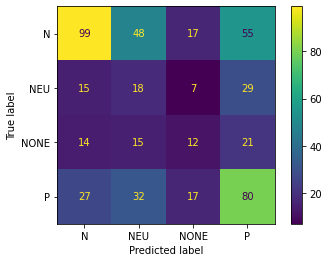

In [31]:
plot_confusion_matrix(gnb, x_test, y_test) 
plt.show()  

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           N       0.64      0.45      0.53       219
         NEU       0.16      0.26      0.20        69
        NONE       0.23      0.19      0.21        62
           P       0.43      0.51      0.47       156

    accuracy                           0.41       506
   macro avg       0.36      0.35      0.35       506
weighted avg       0.46      0.41      0.43       506



In [33]:
f1 = f1_score(y_test, y_predict, average="macro")
precision = precision_score(y_test, y_predict, average="macro")
recall = recall_score(y_test, y_predict, average="macro")
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)

F1:  0.35127945645642206
Precision:  0.36421230989741
Recall:  0.35482331491380653
